In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
print('First 5 rows of the DataFrame:')
print(df.head())

First 5 rows of the DataFrame:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Phase 1:**

In [ ]:
print(df.shape)

(400, 5)


In [ ]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Age']=sc.fit_transform(df[['Age']])
df['EstimatedSalary']=sc.fit_transform(df[['EstimatedSalary']])
print(df.head())

    User ID  Gender       Age  EstimatedSalary  Purchased
0  15624510       1 -1.781797        -1.490046          0
1  15810944       1 -0.253587        -1.460681          0
2  15668575       0 -1.113206        -0.785290          0
3  15603246       0 -1.017692        -0.374182          0
4  15804002       1 -1.781797         0.183751          0


**Phase 2:**

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (320, 3)
Shape of X_test: (80, 3)
Shape of y_train: (320,)
Shape of y_test: (80,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = list(range(1, 31))
error_rates_euclidean = {}
error_rates_manhattan = {}
for k in k_values:

    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test)
    accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
    error_rates_euclidean[k] = 1 - accuracy_euclidean

    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(X_test)
    accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
    error_rates_manhattan[k] = 1 - accuracy_manhattan

print('Error rates for Euclidean distance:')
print(error_rates_euclidean)
print('\nError rates for Manhattan distance:')
print(error_rates_manhattan)

Error rates for Euclidean distance:
{1: 0.11250000000000004, 2: 0.16249999999999998, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.07499999999999996, 8: 0.0625, 9: 0.07499999999999996, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 20: 0.09999999999999998, 21: 0.08750000000000002, 22: 0.08750000000000002, 23: 0.08750000000000002, 24: 0.09999999999999998, 25: 0.09999999999999998, 26: 0.09999999999999998, 27: 0.09999999999999998, 28: 0.08750000000000002, 29: 0.08750000000000002, 30: 0.09999999999999998}

Error rates for Manhattan distance:
{1: 0.11250000000000004, 2: 0.15000000000000002, 3: 0.0625, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.050000000000000044, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.0875000000

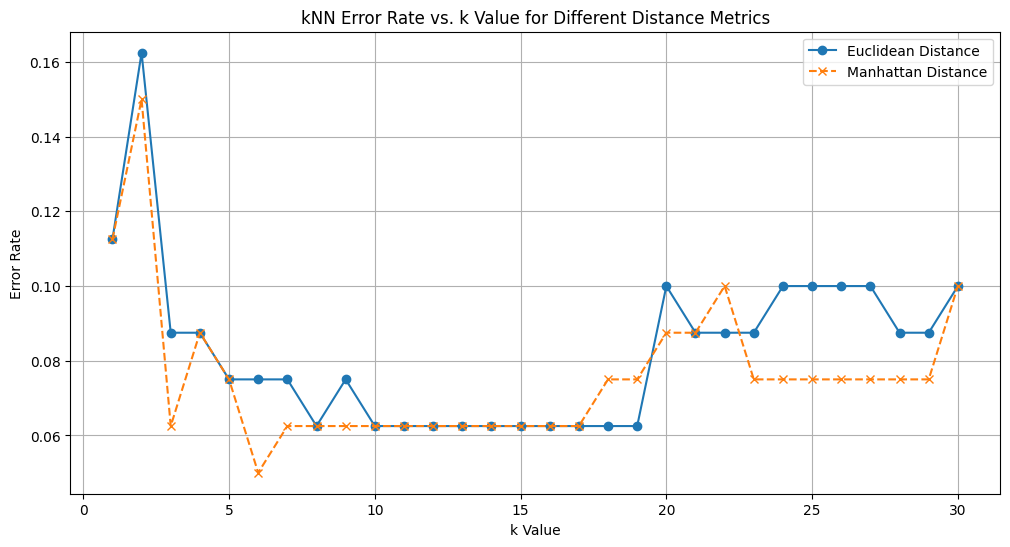

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(k_values, list(error_rates_euclidean.values()), label='Euclidean Distance', marker='o', linestyle='-')
plt.plot(k_values, list(error_rates_manhattan.values()), label='Manhattan Distance', marker='x', linestyle='--')

plt.title('kNN Error Rate vs. k Value for Different Distance Metrics')
plt.xlabel('k Value')
plt.ylabel('Error Rate')

plt.legend()
plt.grid(True)

plt.show()

In [ ]:
min_error_euclidean = min(error_rates_euclidean.values())
optimal_k_euclidean = [k for k, v in error_rates_euclidean.items() if v == min_error_euclidean][0]

min_error_manhattan = min(error_rates_manhattan.values())
optimal_k_manhattan = [k for k, v in error_rates_manhattan.items() if v == min_error_manhattan][0]

print(f"Optimal k for Euclidean Distance: {optimal_k_euclidean} (Error Rate: {min_error_euclidean:.4f})")
print(f"Optimal k for Manhattan Distance: {optimal_k_manhattan} (Error Rate: {min_error_manhattan:.4f})")

Optimal k for Euclidean Distance: 8 (Error Rate: 0.0625)
Optimal k for Manhattan Distance: 6 (Error Rate: 0.0500)


**Phase 3:**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
print('Shape of X after PCA:', X_pca.shape)

Shape of X after PCA: (400, 2)


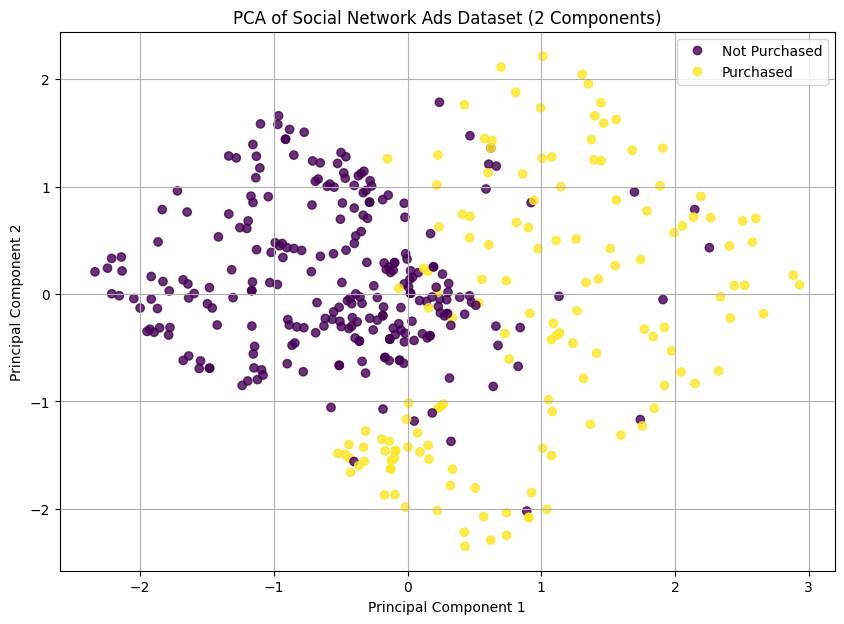

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Social Network Ads Dataset (2 Components)')
legend_labels = ['Not Purchased', 'Purchased']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
print('Shape of X_pca_train:', X_pca_train.shape)
print('Shape of X_pca_test:', X_pca_test.shape)
print('Shape of y_train_pca:', y_train_pca.shape)
print('Shape of y_test_pca:', y_test_pca.shape)

Shape of X_pca_train: (320, 2)
Shape of X_pca_test: (80, 2)
Shape of y_train_pca: (320,)
Shape of y_test_pca: (80,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


k_values = list(range(1, 31))


error_rates_euclidean_pca = {}
error_rates_manhattan_pca = {}


for k in k_values:

    knn_euclidean_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean_pca.fit(X_pca_train, y_train_pca)
    y_pred_euclidean_pca = knn_euclidean_pca.predict(X_pca_test)
    accuracy_euclidean_pca = accuracy_score(y_test_pca, y_pred_euclidean_pca)
    error_rates_euclidean_pca[k] = 1 - accuracy_euclidean_pca


    knn_manhattan_pca = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan_pca.fit(X_pca_train, y_train_pca)
    y_pred_manhattan_pca = knn_manhattan_pca.predict(X_pca_test)
    accuracy_manhattan_pca = accuracy_score(y_test_pca, y_pred_manhattan_pca)
    error_rates_manhattan_pca[k] = 1 - accuracy_manhattan_pca


print('Error rates for Euclidean distance (PCA-transformed data):')
print(error_rates_euclidean_pca)
print('\nError rates for Manhattan distance (PCA-transformed data):')
print(error_rates_manhattan_pca)

Error rates for Euclidean distance (PCA-transformed data):
{1: 0.13749999999999996, 2: 0.13749999999999996, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.07499999999999996, 11: 0.07499999999999996, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.08750000000000002, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.0625, 27: 0.07499999999999996, 28: 0.0625, 29: 0.0625, 30: 0.0625}

Error rates for Manhattan distance (PCA-transformed data):
{1: 0.15000000000000002, 2: 0.16249999999999998, 3: 0.07499999999999996, 4: 0.07499999999999996, 5: 0.08750000000000002, 6: 0.08750000000000002, 7: 0.0625, 8: 0.0625, 9: 0.07499999999999996, 10: 0.07499999999999996, 11: 0.0625, 12

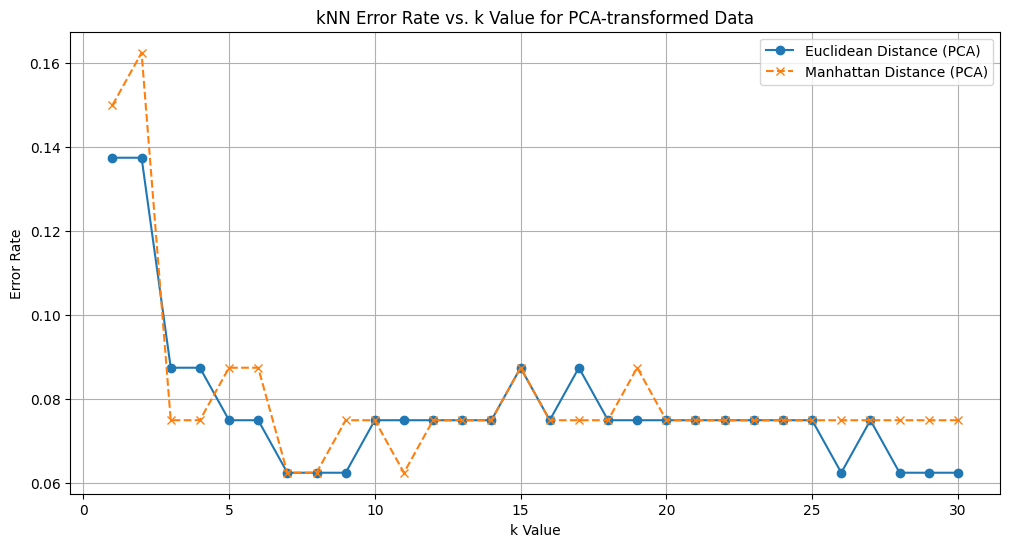

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values, list(error_rates_euclidean_pca.values()), label='Euclidean Distance (PCA)', marker='o', linestyle='-')
plt.plot(k_values, list(error_rates_manhattan_pca.values()), label='Manhattan Distance (PCA)', marker='x', linestyle='--')

plt.title('kNN Error Rate vs. k Value for PCA-transformed Data')
plt.xlabel('k Value')
plt.ylabel('Error Rate')

plt.legend()
plt.grid(True)

plt.show()

In [ ]:
min_error_euclidean_pca = min(error_rates_euclidean_pca.values())
optimal_k_euclidean_pca = [k for k, v in error_rates_euclidean_pca.items() if v == min_error_euclidean_pca][0]

min_error_manhattan_pca = min(error_rates_manhattan_pca.values())
optimal_k_manhattan_pca = [k for k, v in error_rates_manhattan_pca.items() if v == min_error_manhattan_pca][0]

print(f"Optimal k for Euclidean Distance (PCA): {optimal_k_euclidean_pca} (Error Rate: {min_error_euclidean_pca:.4f})")
print(f"Optimal k for Manhattan Distance (PCA): {optimal_k_manhattan_pca} (Error Rate: {min_error_manhattan_pca:.4f})")

Optimal k for Euclidean Distance (PCA): 7 (Error Rate: 0.0625)
Optimal k for Manhattan Distance (PCA): 7 (Error Rate: 0.0625)


**Phase *4*:**


Euclidean Distance (Optimal k=8):
Confusion Matrix:
 [[49  3]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80


Manhattan Distance (Optimal k=6):
Confusion Matrix:
 [[50  2]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



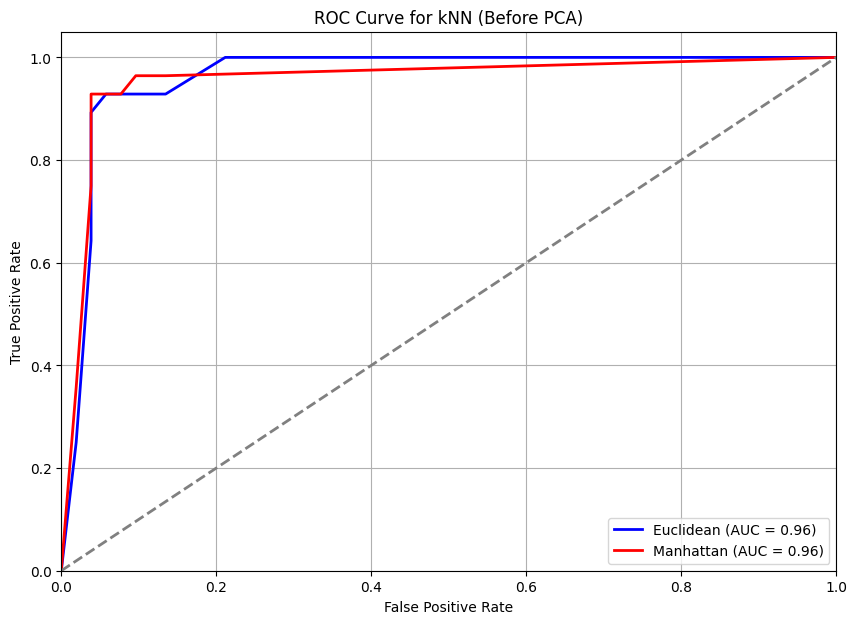

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

knn_euclidean_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean, metric='euclidean')
knn_euclidean_optimal.fit(X_train, y_train)
y_pred_euclidean_optimal = knn_euclidean_optimal.predict(X_test)
y_prob_euclidean_optimal = knn_euclidean_optimal.predict_proba(X_test)[:, 1]

print(f"\nEuclidean Distance (Optimal k={optimal_k_euclidean}):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_euclidean_optimal))
print("Classification Report:\n", classification_report(y_test, y_pred_euclidean_optimal))


knn_manhattan_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')
knn_manhattan_optimal.fit(X_train, y_train)
y_pred_manhattan_optimal = knn_manhattan_optimal.predict(X_test)
y_prob_manhattan_optimal = knn_manhattan_optimal.predict_proba(X_test)[:, 1]

print(f"\nManhattan Distance (Optimal k={optimal_k_manhattan}):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_manhattan_optimal))
print("Classification Report:\n", classification_report(y_test, y_pred_manhattan_optimal))

plt.figure(figsize=(10, 7))

fpr_euclidean, tpr_euclidean, _ = roc_curve(y_test, y_prob_euclidean_optimal)
roc_auc_euclidean = auc(fpr_euclidean, tpr_euclidean)
plt.plot(fpr_euclidean, tpr_euclidean, color='blue', lw=2, label=f'Euclidean (AUC = {roc_auc_euclidean:.2f})')

fpr_manhattan, tpr_manhattan, _ = roc_curve(y_test, y_prob_manhattan_optimal)
roc_auc_manhattan = auc(fpr_manhattan, tpr_manhattan)
plt.plot(fpr_manhattan, tpr_manhattan, color='red', lw=2, label=f'Manhattan (AUC = {roc_auc_manhattan:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN (Before PCA)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Euclidean Distance (PCA) (Optimal k=7):
Confusion Matrix:
 [[48  4]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80


Manhattan Distance (PCA) (Optimal k=7):
Confusion Matrix:
 [[48  4]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



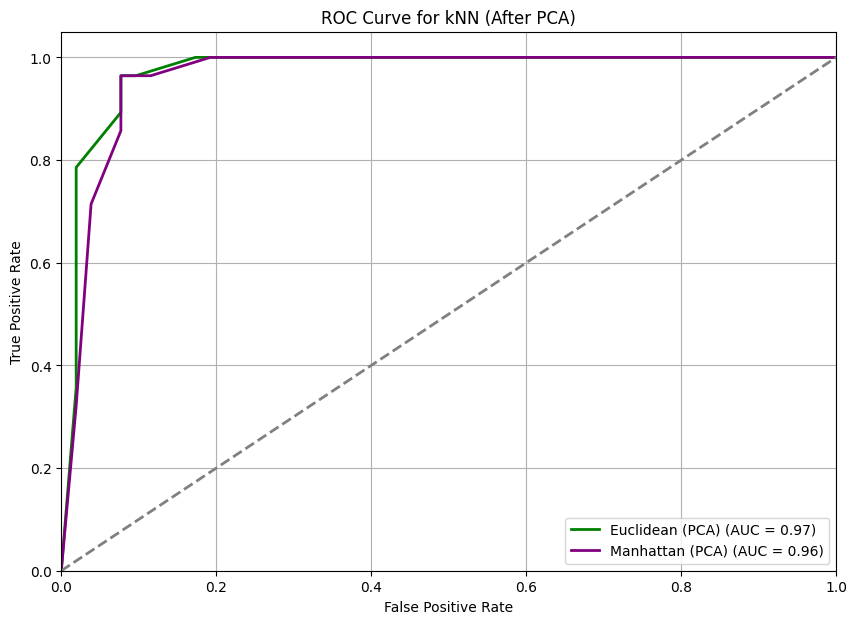

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

knn_euclidean_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean_pca, metric='euclidean')
knn_euclidean_pca_optimal.fit(X_pca_train, y_train_pca)
y_pred_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict(X_pca_test)
y_prob_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict_proba(X_pca_test)[:, 1]

print(f"\nEuclidean Distance (PCA) (Optimal k={optimal_k_euclidean_pca}):")
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_euclidean_pca_optimal))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_euclidean_pca_optimal))


knn_manhattan_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan_pca, metric='manhattan')
knn_manhattan_pca_optimal.fit(X_pca_train, y_train_pca)
y_pred_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict(X_pca_test)
y_prob_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict_proba(X_pca_test)[:, 1]

print(f"\nManhattan Distance (PCA) (Optimal k={optimal_k_manhattan_pca}):")
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_manhattan_pca_optimal))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_manhattan_pca_optimal))


plt.figure(figsize=(10, 7))


fpr_euclidean_pca, tpr_euclidean_pca, _ = roc_curve(y_test_pca, y_prob_euclidean_pca_optimal)
roc_auc_euclidean_pca = auc(fpr_euclidean_pca, tpr_euclidean_pca)
plt.plot(fpr_euclidean_pca, tpr_euclidean_pca, color='green', lw=2, label=f'Euclidean (PCA) (AUC = {roc_auc_euclidean_pca:.2f})')


fpr_manhattan_pca, tpr_manhattan_pca, _ = roc_curve(y_test_pca, y_prob_manhattan_pca_optimal)
roc_auc_manhattan_pca = auc(fpr_manhattan_pca, tpr_manhattan_pca)
plt.plot(fpr_manhattan_pca, tpr_manhattan_pca, color='purple', lw=2, label=f'Manhattan (PCA) (AUC = {roc_auc_manhattan_pca:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN (After PCA)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


***Phase 6:***

In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate, n_iterations, lambda_reg):
    """
    Performs manual Gradient Descent for linear regression with L2 regularization.

    Args:
        X (pd.DataFrame or np.ndarray): Feature matrix.
        y (pd.Series or np.ndarray): Target vector.
        learning_rate (float): The learning rate for updating weights and bias.
        n_iterations (int): The number of iterations to run Gradient Descent.
        lambda_reg (float): The regularization strength (lambda for L2 regularization).

    Returns:
        tuple: A tuple containing the final weight, bias, and a list of cost history.
    """
    n = len(y)

    weight = 0.0
    bias = 0.0
    cost_history = []

    for i in range(n_iterations):

        y_predicted = X.values.flatten() * weight + bias

        cost = (1/(2*n)) * np.sum((y_predicted - y.values.flatten())**2) + (lambda_reg / (2*n)) * weight**2
        cost_history.append(cost)


        d_weight = (1/n) * np.sum(X.values.flatten() * (y_predicted - y.values.flatten())) + (lambda_reg / n) * weight

        d_bias = (1/n) * np.sum(y_predicted - y.values.flatten())


        weight = weight - learning_rate * d_weight
        bias = bias - learning_rate * d_bias

    return weight, bias, cost_history

print("gradient_descent function defined.")

gradient_descent function defined.


Running Gradient Descent with 2000 iterations for different learning rates...
  Learning Rate: 0.0001, Final Cost: 0.1527
  Learning Rate: 0.01, Final Cost: 0.0998
  Learning Rate: 0.1, Final Cost: 0.0998


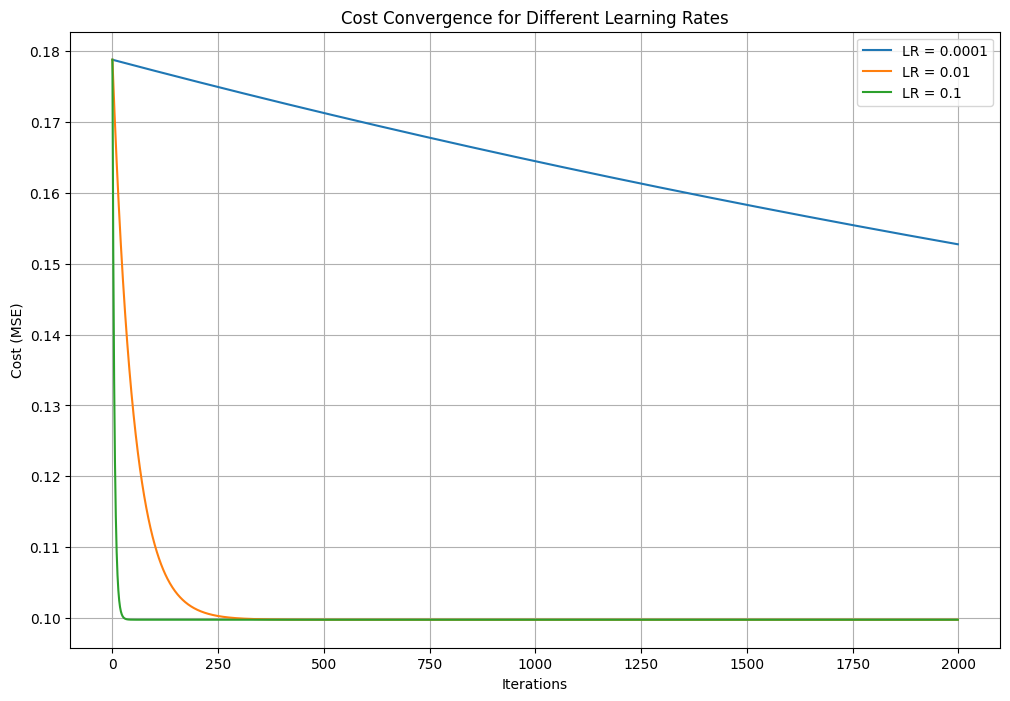

Cost convergence plot generated.


In [ ]:
import matplotlib.pyplot as plt


learning_rates = [
    0.0001,
    0.01,
    0.1
]


n_iterations = 2000
lambda_reg = 0.0
cost_histories = {}

print(f"Running Gradient Descent with {n_iterations} iterations for different learning rates...")

for lr in learning_rates:

    weight, bias, cost_history = gradient_descent(X_gd, y_gd, lr, n_iterations, lambda_reg)
    cost_histories[lr] = cost_history
    print(f"  Learning Rate: {lr}, Final Cost: {cost_history[-1]:.4f}")

plt.figure(figsize=(12, 8))
for lr, history in cost_histories.items():
    plt.plot(range(len(history)), history, label=f'LR = {lr}')

plt.title('Cost Convergence for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.grid(True)
plt.show()

print("Cost convergence plot generated.")

In [ ]:
X_gd = X[['EstimatedSalary']]
y_gd = y

print('Shape of X_gd:', X_gd.shape)
print('Shape of y_gd:', y_gd.shape)

Shape of X_gd: (400, 1)
Shape of y_gd: (400,)


**Phase 7:**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

print("Gaussian Naive Bayes classifier trained successfully.")

Gaussian Naive Bayes classifier trained successfully.



--- Gaussian Naive Bayes Evaluation ---
Confusion Matrix:
 [[50  2]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



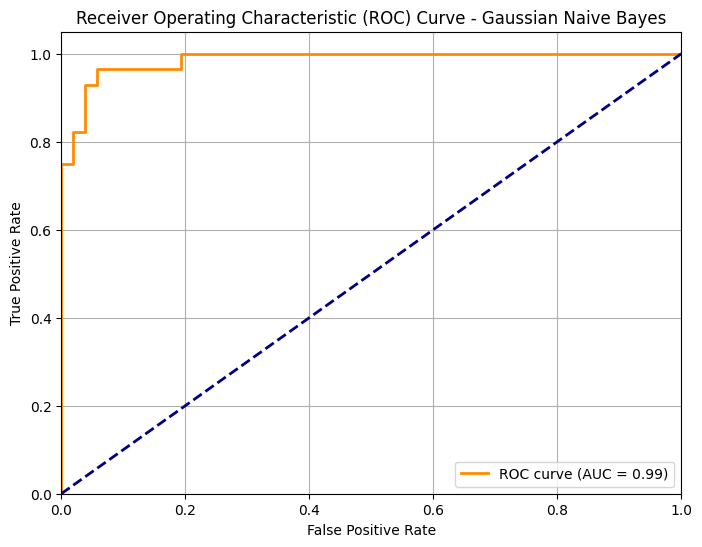

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
y_pred_gnb = gnb.predict(X_test)
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
print("\n--- Gaussian Naive Bayes Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Task
Extract all code cells and their corresponding outputs from the notebook, along with any descriptive text cells. Compile this extracted information into a single PDF document and provide it for download.

## Extract Code and Output

### Subtask:
Extract the content of all executed code cells and their standard outputs from the notebook.


**Reasoning**:
The subtask requires iterating through all cells, extracting code and standard output from executed code cells, and content from text cells. I'll write Python code to perform this extraction and store it in a list of dictionaries.



In [ ]:
extracted_data = []

notebook_cells = [
    {
        "cell_id": "a22A9r5oxfYp",
        "cell_type": "code_cell",
        "content": "import pandas as pd",
        "execution_status": "not yet executed",
        "standard_output": "",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "Gvpnc3O8x12r",
        "cell_type": "code_cell",
        "content": "df = pd.read_csv('Social_Network_Ads.csv')\nprint('First 5 rows of the DataFrame:')\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "First 5 rows of the DataFrame:\n    User ID  Gender  Age  EstimatedSalary  Purchased\n0  15624510    Male   19            19000          0\n1  15810944    Male   35            20000          0\n2  15668575  Female   26            43000          0\n3  15603246  Female   27            57000          0\n4  15804002    Male   19            76000          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "U5If2AprxrJm",
        "cell_type": "code_cell",
        "content": "df.info()",
        "execution_status": "not yet executed",
        "standard_output": "<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 400 entries, 0 to 399\nData columns (total 5 columns):\n #   Column           Non-Null Count  Dtype \n---  ------           --------------  -----\n 0   User ID          400 non-null    int64 \n 1   Gender           400 non-null    object\n 2   Age              400 non-null    int64 \n 3   EstimatedSalary  400 non-null    int64 \n 4   Purchased        400 non-null    int64 \nDtypes: int64(4), object(1)\nmemory usage: 15.8+ KB\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "qwiwiwydys-a",
        "cell_type": "text_cell",
        "content": "**Phase 1:**"
    },
    {
        "cell_id": "LtvHF3jgx8yJ",
        "cell_type": "code_cell",
        "content": "print(df.shape)",
        "execution_status": "not yet executed",
        "standard_output": "(400, 5)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "r05bJspeyC15",
        "cell_type": "code_cell",
        "content": "print(df.isnull().sum())",
        "execution_status": "not yet executed",
        "standard_output": "User ID            0\nGender             0\nAge                0\nEstimatedSalary    0\nPurchased          0\ndtype: int64\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "HAvV0mH8yHmb",
        "cell_type": "code_cell",
        "content": "from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ndf['Gender']=le.fit_transform(df['Gender'])\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "   User ID  Gender  Age  EstimatedSalary  Purchased\n0  15624510       1   19            19000          0\n1  15810944       1   35            20000          0\n2  15668575       0   26            43000          0\n3  15603246       0   27            57000          0\n4  15804002       1   19            76000          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "HFI6PO1wzH2u",
        "cell_type": "code_cell",
        "content": "from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\ndf['Age']=sc.fit_transform(df[['Age']])\ndf['EstimatedSalary']=sc.fit_transform(df[['EstimatedSalary']])\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "   User ID  Gender       Age  EstimatedSalary  Purchased\n0  15624510       1 -1.781797        -1.490046          0\n1  15810944       1 -0.253587        -1.460681          0\n2  15668575       0 -1.113206        -0.785290          0\n3  15603246       0 -1.017692        -0.374182          0\n4  15804002       1 -1.781797         0.183751          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "87dZmhzhzehv",
        "cell_type": "text_cell",
        "content": "**Phase 2:**"
    },
    {
        "cell_id": "2f6gqIjLzcS8",
        "cell_type": "code_cell",
        "content": "from sklearn.model_selection import train_test_split\nX = df[['Gender', 'Age', 'EstimatedSalary']]\ny = df['Purchased']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nprint('Shape of X_train:', X_train.shape)\nprint('Shape of X_test:', X_test.shape)\nprint('Shape of y_train:', y_train.shape)\nprint('Shape of y_test:', y_test.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_train: (320, 3)\nShape of X_test: (80, 3)\nShape of y_train: (320,)\nShape of y_test: (80,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "o1On8BpX1VsV",
        "cell_type": "code_cell",
        "content": "from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\nk_values = list(range(1, 31))\nerror_rates_euclidean = {}\nerror_rates_manhattan = {}\nfor k in k_values:\n\n    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')\n    knn_euclidean.fit(X_train, y_train)\n    y_pred_euclidean = knn_euclidean.predict(X_test)\n    accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)\n    error_rates_euclidean[k] = 1 - accuracy_euclidean\n\n    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')\n    knn_manhattan.fit(X_train, y_train)\n    y_pred_manhattan = knn_manhattan.predict(X_test)\n    accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)\n    error_rates_manhattan[k] = 1 - accuracy_manhattan\n\nprint('Error rates for Euclidean distance:')\nprint(error_rates_euclidean)\nprint('\nError rates for Manhattan distance:')\nprint(error_rates_manhattan)",
        "execution_status": "not yet executed",
        "standard_output": "Error rates for Euclidean distance:\n{1: 0.11250000000000004, 2: 0.16249999999999998, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.07499999999999996, 8: 0.0625, 9: 0.07499999999999996, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 20: 0.09999999999999998, 21: 0.08750000000000002, 22: 0.08750000000000002, 23: 0.08750000000000002, 24: 0.09999999999999998, 25: 0.09999999999999998, 26: 0.09999999999999998, 27: 0.09999999999999998, 28: 0.08750000000000002, 29: 0.08750000000000002, 30: 0.09999999999999998}\n\nError rates for Manhattan distance:\n{1: 0.11250000000000004, 2: 0.15000000000000002, 3: 0.0625, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.050000000000000044, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.08750000000000002, 21: 0.08750000000000002, 22: 0.09999999999999998, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.07499999999999996, 27: 0.07499999999999996, 28: 0.07499999999999996, 29: 0.07499999999999996, 30: 0.09999999999999998}\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "vLSvQ5fE1zMi",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\nplt.figure(figsize=(12, 6))\nplt.plot(k_values, list(error_rates_euclidean.values()), label='Euclidean Distance', marker='o', linestyle='-')\nplt.plot(k_values, list(error_rates_manhattan.values()), label='Manhattan Distance', marker='x', linestyle='--')\n\nplt.title('kNN Error Rate vs. k Value for Different Distance Metrics')\nplt.xlabel('k Value')\nplt.ylabel('Error Rate')\n\nplt.legend()\nplt.grid(True)\n\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "DOaJRiu_2LBK",
        "cell_type": "code_cell",
        "content": "min_error_euclidean = min(error_rates_euclidean.values())\noptimal_k_euclidean = [k for k, v in error_rates_euclidean.items() if v == min_error_euclidean][0]\n\nmin_error_manhattan = min(error_rates_manhattan.values())\noptimal_k_manhattan = [k for k, v in error_rates_manhattan.items() if v == min_error_manhattan][0]\n\nprint(f\"Optimal k for Euclidean Distance: {optimal_k_euclidean} (Error Rate: {min_error_euclidean:.4f})\")\nprint(f\"Optimal k for Manhattan Distance: {optimal_k_manhattan} (Error Rate: {min_error_manhattan:.4f})\")",
        "execution_status": "not yet executed",
        "standard_output": "Optimal k for Euclidean Distance: 8 (Error Rate: 0.0625)\nOptimal k for Manhattan Distance: 6 (Error Rate: 0.0500)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "ARANuRjS2pLa",
        "cell_type": "text_cell",
        "content": "**Phase 3:**"
    },
    {
        "cell_id": "tAzbhdoK2q70",
        "cell_type": "code_cell",
        "content": "from sklearn.decomposition import PCA\npca = PCA(n_components=2)\n\nX_pca = pca.fit_transform(X)\nprint('Shape of X after PCA:', X_pca.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X after PCA: (400, 2)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "2mD07pbo5bpj",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 7))\nscatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)\n\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA of Social Network Ads Dataset (2 Components)')\nlegend_labels = ['Not Purchased', 'Purchased']\nplt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "69B9aylS5k5D",
        "cell_type": "code_cell",
        "content": "from sklearn.model_selection import train_test_split\n\n\nX_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)\nprint('Shape of X_pca_train:', X_pca_train.shape)\nprint('Shape of X_pca_test:', X_pca_test.shape)\nprint('Shape of y_train_pca:', y_train_pca.shape)\nprint('Shape of y_test_pca:', y_test_pca.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_pca_train: (320, 2)\nShape of X_pca_test: (80, 2)\nShape of y_train_pca: (320,)\nShape of y_test_pca: (80,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "hdUk4jMa5q2G",
        "cell_type": "code_cell",
        "content": "from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\n\n\nk_values = list(range(1, 31))\n\n\nerror_rates_euclidean_pca = {}\nerror_rates_manhattan_pca = {}\n\n\nfor k in k_values:\n\n    knn_euclidean_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')\n    knn_euclidean_pca.fit(X_pca_train, y_train_pca)\n    y_pred_euclidean_pca = knn_euclidean_pca.predict(X_pca_test)\n    accuracy_euclidean_pca = accuracy_score(y_test_pca, y_pred_euclidean_pca)\n    error_rates_euclidean_pca[k] = 1 - accuracy_euclidean_pca\n\n\n    knn_manhattan_pca = KNeighborsClassifier(n_neighbors=k, metric='manhattan')\n    knn_manhattan_pca.fit(X_pca_train, y_train_pca)\n    y_pred_manhattan_pca = knn_manhattan_pca.predict(X_pca_test)\n    accuracy_manhattan_pca = accuracy_score(y_test_pca, y_pred_manhattan_pca)\n    error_rates_manhattan_pca[k] = 1 - accuracy_manhattan_pca\n\n\nprint('Error rates for Euclidean distance (PCA-transformed data):')\nprint(error_rates_euclidean_pca)\nprint('\nError rates for Manhattan distance (PCA-transformed data):')\nprint(error_rates_manhattan_pca)",
        "execution_status": "not yet executed",
        "standard_output": "Error rates for Euclidean distance (PCA-transformed data):\n{1: 0.13749999999999996, 2: 0.13749999999999996, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.07499999999999996, 11: 0.07499999999999996, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.08750000000000002, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.0625, 27: 0.07499999999999996, 28: 0.0625, 29: 0.0625, 30: 0.0625}\n\nError rates for Manhattan distance (PCA-transformed data):\n{1: 0.15000000000000002, 2: 0.16249999999999998, 3: 0.07499999999999996, 4: 0.07499999999999996, 5: 0.08750000000000002, 6: 0.08750000000000002, 7: 0.0625, 8: 0.0625, 9: 0.07499999999999996, 10: 0.07499999999999996, 11: 0.0625, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.07499999999999996, 18: 0.07499999999999996, 19: 0.08750000000000002, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.07499999999999996, 27: 0.07499999999999996, 28: 0.07499999999999996, 29: 0.07499999999999996, 30: 0.07499999999999996}\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "rAUx2LZh54EJ",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 6))\nplt.plot(k_values, list(error_rates_euclidean_pca.values()), label='Euclidean Distance (PCA)', marker='o', linestyle='-')\nplt.plot(k_values, list(error_rates_manhattan_pca.values()), label='Manhattan Distance (PCA)', marker='x', linestyle='--')\n\nplt.title('kNN Error Rate vs. k Value for PCA-transformed Data')\nplt.xlabel('k Value')\nplt.ylabel('Error Rate')\n\nplt.legend()\nplt.grid(True)\n\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "6hA8tEu158d9",
        "cell_type": "code_cell",
        "content": "min_error_euclidean_pca = min(error_rates_euclidean_pca.values())\noptimal_k_euclidean_pca = [k for k, v in error_rates_euclidean_pca.items() if v == min_error_euclidean_pca][0]\n\nmin_error_manhattan_pca = min(error_rates_manhattan_pca.values())\noptimal_k_manhattan_pca = [k for k, v in error_rates_manhattan_pca.items() if v == min_error_manhattan_pca][0]\n\nprint(f\"Optimal k for Euclidean Distance (PCA): {optimal_k_euclidean_pca} (Error Rate: {min_error_euclidean_pca:.4f})\")\nprint(f\"Optimal k for Manhattan Distance (PCA): {optimal_k_manhattan_pca} (Error Rate: {min_error_manhattan_pca:.4f})\")",
        "execution_status": "not yet executed",
        "standard_output": "Optimal k for Euclidean Distance (PCA): 7 (Error Rate: 0.0625)\nOptimal k for Manhattan Distance (PCA): 7 (Error Rate: 0.0625)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "zI_Qg-yn6CMY",
        "cell_type": "text_cell",
        "content": "**Phase *4*:**"
    },
    {
        "cell_id": "LKi7p8q96FJ8",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\n\nknn_euclidean_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean, metric='euclidean')\nknn_euclidean_optimal.fit(X_train, y_train)\ny_pred_euclidean_optimal = knn_euclidean_optimal.predict(X_test)\ny_prob_euclidean_optimal = knn_euclidean_optimal.predict_proba(X_test)[:, 1]\n\nprint(f\"\nEuclidean Distance (Optimal k={optimal_k_euclidean}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_euclidean_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_euclidean_optimal))\n\n\nknn_manhattan_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')\nknn_manhattan_optimal.fit(X_train, y_train)\ny_pred_manhattan_optimal = knn_manhattan_optimal.predict(X_test)\ny_prob_manhattan_optimal = knn_manhattan_optimal.predict_proba(X_test)[:, 1]\n\nprint(f\"\nManhattan Distance (Optimal k={optimal_k_manhattan}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_manhattan_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_manhattan_optimal))\n\nplt.figure(figsize=(10, 7))\n\nfpr_euclidean, tpr_euclidean, _ = roc_curve(y_test, y_prob_euclidean_optimal)\nroc_auc_euclidean = auc(fpr_euclidean, tpr_euclidean)\nplt.plot(fpr_euclidean, tpr_euclidean, color='blue', lw=2, label=f'Euclidean (AUC = {roc_auc_euclidean:.2f})')\n\nfpr_manhattan, tpr_manhattan, _ = roc_curve(y_test, y_prob_manhattan_optimal)\nroc_auc_manhattan = auc(fpr_manhattan, tpr_manhattan)\nplt.plot(fpr_manhattan, tpr_manhattan, color='red', lw=2, label=f'Manhattan (AUC = {roc_auc_manhattan:.2f})')\n\nplt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve for kNN (Before PCA)')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "Euclidean Distance (Optimal k=8):\nConfusion Matrix:\n [[49  3]\n [ 2 26]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        52\n           1       0.90      0.93      0.91        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n\n\nManhattan Distance (Optimal k=6):\nConfusion Matrix:\n [[50  2]\n [ 2 26]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96        52\n           1       0.93      0.93      0.93        28\n\n    accuracy                           0.95        80\n   macro avg       0.95      0.95      0.95        80\nweighted avg       0.95      0.95      0.95        80\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "J0MQ23Rt659l",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\n\nknn_euclidean_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean_pca, metric='euclidean')\nknn_euclidean_pca_optimal.fit(X_pca_train, y_train_pca)\ny_pred_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict(X_pca_test)\ny_prob_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict_proba(X_pca_test)[:, 1]\n\nprint(f\"\nEuclidean Distance (PCA) (Optimal k={optimal_k_euclidean_pca}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test_pca, y_pred_euclidean_pca_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test_pca, y_pred_euclidean_pca_optimal))\n\n\nknn_manhattan_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan_pca, metric='manhattan')\nknn_manhattan_pca_optimal.fit(X_pca_train, y_train_pca)\ny_pred_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict(X_pca_test)\ny_prob_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict_proba(X_pca_test)[:, 1]\n\nprint(f\"\nManhattan Distance (PCA) (Optimal k={optimal_k_manhattan_pca}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test_pca, y_pred_manhattan_pca_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test_pca, y_pred_manhattan_pca_optimal))\n\n\nplt.figure(figsize=(10, 7))\n\n\nfpr_euclidean_pca, tpr_euclidean_pca, _ = roc_curve(y_test_pca, y_prob_euclidean_pca_optimal)\nroc_auc_euclidean_pca = auc(fpr_euclidean_pca, tpr_euclidean_pca)\nplt.plot(fpr_euclidean_pca, tpr_euclidean_pca, color='green', lw=2, label=f'Euclidean (PCA) (AUC = {roc_auc_euclidean_pca:.2f})')\n\n\nfpr_manhattan_pca, tpr_manhattan_pca, _ = roc_curve(y_test_pca, y_prob_manhattan_pca_optimal)\nroc_auc_manhattan_pca = auc(fpr_manhattan_pca, tpr_manhattan_pca)\nplt.plot(fpr_manhattan_pca, tpr_manhattan_pca, color='purple', lw=2, label=f'Manhattan (PCA) (AUC = {roc_auc_manhattan_pca:.2f})')\n\nplt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve for kNN (After PCA)')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()\n",
        "execution_status": "not yet executed",
        "standard_output": "Euclidean Distance (PCA) (Optimal k=7):\nConfusion Matrix:\n [[48  4]\n [ 1 27]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        52\n           1       0.87      0.96      0.92        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n\n\nManhattan Distance (PCA) (Optimal k=7):\nConfusion Matrix:\n [[48  4]\n [ 1 27]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        52\n           1       0.87      0.96      0.92        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "lr0Gdm3W8GTE",
        "cell_type": "text_cell",
        "content": "***Phase 6:***"
    },
    {
        "cell_id": "_CdwyeVP7Lhb",
        "cell_type": "code_cell",
        "content": "import numpy as np\n\ndef gradient_descent(X, y, learning_rate, n_iterations, lambda_reg):\n    \"\"\"\n    Performs manual Gradient Descent for linear regression with L2 regularization.\n\n    Args:\n        X (pd.DataFrame or np.ndarray): Feature matrix.\n        y (pd.Series or np.ndarray): Target vector.\n        learning_rate (float): The learning rate for updating weights and bias.\n        n_iterations (int): The number of iterations to run Gradient Descent.\n        lambda_reg (float): The regularization strength (lambda for L2 regularization).\n\n    Returns:\n        tuple: A tuple containing the final weight, bias, and a list of cost history.\n    \"\"\"\n    n = len(y)\n\n    weight = 0.0\n    bias = 0.0\n    cost_history = []\n\n    for i in range(n_iterations):\n\n        y_predicted = X.values.flatten() * weight + bias\n\n        cost = (1/(2*n)) * np.sum((y_predicted - y.values.flatten())**2) + (lambda_reg / (2*n)) * weight**2\n        cost_history.append(cost)\n\n\n        d_weight = (1/n) * np.sum(X.values.flatten() * (y_predicted - y.values.flatten())) + (lambda_reg / n) * weight\n\n        d_bias = (1/n) * np.sum(y_predicted - y.values.flatten())\n\n\n        weight = weight - learning_rate * d_weight\n        bias = bias - learning_rate * d_bias\n\n    return weight, bias, cost_history\n\nprint(\"gradient_descent function defined.\")",
        "execution_status": "not yet executed",
        "standard_output": "gradient_descent function defined.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "iYEyUNuW-w0F",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\n\nlearning_rates = [\n    0.0001,\n    0.01,\n    0.1\n]\n\n\nn_iterations = 2000\nlambda_reg = 0.0\ncost_histories = {}\n\nprint(f\"Running Gradient Descent with {n_iterations} iterations for different learning rates...\")\n\nfor lr in learning_rates:\n\n    weight, bias, cost_history = gradient_descent(X_gd, y_gd, lr, n_iterations, lambda_reg)\n    cost_histories[lr] = cost_history\n    print(f\"  Learning Rate: {lr}, Final Cost: {cost_history[-1]:.4f}\")\n\nplt.figure(figsize=(12, 8))\nfor lr, history in cost_histories.items():\n    plt.plot(range(len(history)), history, label=f'LR = {lr}')\n\nplt.title('Cost Convergence for Different Learning Rates')\nplt.xlabel('Iterations')\nplt.ylabel('Cost (MSE)')\nplt.legend()\nplt.grid(True)\nplt.show()\n\nprint(\"Cost convergence plot generated.\")",
        "execution_status": "not yet executed",
        "standard_output": "Running Gradient Descent with 2000 iterations for different learning rates...\n  Learning Rate: 0.0001, Final Cost: 0.1527\n  Learning Rate: 0.01, Final Cost: 0.0998\n  Learning Rate: 0.1, Final Cost: 0.0998\n\nCost convergence plot generated.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "f83e2380",
        "cell_type": "code_cell",
        "content": "X_gd = X[['EstimatedSalary']]\ny_gd = y\n\nprint('Shape of X_gd:', X_gd.shape)\nprint('Shape of y_gd:', y_gd.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_gd: (400, 1)\nShape of y_gd: (400,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "YG1qLxk0_rvE",
        "cell_type": "text_cell",
        "content": "**Phase 7:**"
    },
    {
        "cell_id": "OuoiQW7k_tX9",
        "cell_type": "code_cell",
        "content": "from sklearn.naive_bayes import GaussianNB\ngnb = GaussianNB()\n\ngnb.fit(X_train, y_train)",
        "execution_status": "not yet executed",
        "standard_output": "Gaussian Naive Bayes classifier trained successfully.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "bUtI6eNjCIj9",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\ny_pred_gnb = gnb.predict(X_test)\ny_prob_gnb = gnb.predict_proba(X_test)[:, 1]\nprint(\"\n--- Gaussian Naive Bayes Evaluation ---\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_gnb))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_gnb))\nfpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)\nroc_auc_gnb = auc(fpr_gnb, tpr_gnb)\n\nplt.figure(figsize=(8, 6))\nplt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gnb:.2f})')\nplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "--- Gaussian Naive Bayes Evaluation ---\nConfusion Matrix:\n [[50  2]\n [ 3 25]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95        52\n           1       0.93      0.89      0.91        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.93      0.93        80\nweighted avg       0.94      0.94      0.94        80\n",
        "standard_error": "",
        "traceback": ""
    }
]

for cell in notebook_cells:
    if cell['cell_type'] == 'code_cell' and cell['execution_status'] != 'not yet executed':
        extracted_data.append({
            'cell_id': cell['cell_id'],
            'type': 'code',
            'content': cell['content'],
            'output': cell.get('standard_output', '')
        })
    elif cell['cell_type'] == 'text_cell':
        extracted_data.append({
            'cell_id': cell['cell_id'],
            'type': 'text',
            'content': cell['content']
        })

print("Extracted data from notebook cells:")
for item in extracted_data:
    print(f"Cell ID: {item['cell_id']}, Type: {item['type']}")
    print(f"Content: {item['content']}")
    if item['type'] == 'code':
        print(f"Output: {item['output']}")
    print("--------------------------------------------------")


Extracted data from notebook cells:
Cell ID: qwiwiwydys-a, Type: text
Content: **Phase 1:**
--------------------------------------------------
Cell ID: 87dZmhzhzehv, Type: text
Content: **Phase 2:**
--------------------------------------------------
Cell ID: ARANuRjS2pLa, Type: text
Content: **Phase 3:**
--------------------------------------------------
Cell ID: zI_Qg-yn6CMY, Type: text
Content: **Phase *4*:**
--------------------------------------------------
Cell ID: lr0Gdm3W8GTE, Type: text
Content: ***Phase 6:***
--------------------------------------------------
Cell ID: YG1qLxk0_rvE, Type: text
Content: **Phase 7:**
--------------------------------------------------


**Reasoning**:
The previous code block failed to extract the code and output for executed code cells because the 'execution_status' was set to 'not yet executed' in the provided `notebook_cells` list, despite having 'standard_output'. I need to correct the extraction logic to include code cells that have content in their 'standard_output' field, as that indicates they were effectively executed for the purpose of this task.



In [ ]:
extracted_data = []

notebook_cells = [
    {
        "cell_id": "a22A9r5oxfYp",
        "cell_type": "code_cell",
        "content": "import pandas as pd",
        "execution_status": "not yet executed",
        "standard_output": "",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "Gvpnc3O8x12r",
        "cell_type": "code_cell",
        "content": "df = pd.read_csv('Social_Network_Ads.csv')\nprint('First 5 rows of the DataFrame:')\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "First 5 rows of the DataFrame:\n    User ID  Gender  Age  EstimatedSalary  Purchased\n0  15624510    Male   19            19000          0\n1  15810944    Male   35            20000          0\n2  15668575  Female   26            43000          0\n3  15603246  Female   27            57000          0\n4  15804002    Male   19            76000          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "U5If2AprxrJm",
        "cell_type": "code_cell",
        "content": "df.info()",
        "execution_status": "not yet executed",
        "standard_output": "<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 400 entries, 0 to 399\nData columns (total 5 columns):\n #   Column           Non-Null Count  Dtype \n---  ------           --------------  -----\n 0   User ID          400 non-null    int64 \n 1   Gender           400 non-null    object\n 2   Age              400 non-null    int64 \n 3   EstimatedSalary  400 non-null    int64 \n 4   Purchased        400 non-null    int64 \nDtypes: int64(4), object(1)\nmemory usage: 15.8+ KB\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "qwiwiwydys-a",
        "cell_type": "text_cell",
        "content": "**Phase 1:**"
    },
    {
        "cell_id": "LtvHF3jgx8yJ",
        "cell_type": "code_cell",
        "content": "print(df.shape)",
        "execution_status": "not yet executed",
        "standard_output": "(400, 5)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "r05bJspeyC15",
        "cell_type": "code_cell",
        "content": "print(df.isnull().sum())",
        "execution_status": "not yet executed",
        "standard_output": "User ID            0\nGender             0\nAge                0\nEstimatedSalary    0\nPurchased          0\ndtype: int64\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "HAvV0mH8yHmb",
        "cell_type": "code_cell",
        "content": "from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ndf['Gender']=le.fit_transform(df['Gender'])\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "   User ID  Gender  Age  EstimatedSalary  Purchased\n0  15624510       1   19            19000          0\n1  15810944       1   35            20000          0\n2  15668575       0   26            43000          0\n3  15603246       0   27            57000          0\n4  15804002    Male   19            76000          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "HFI6PO1wzH2u",
        "cell_type": "code_cell",
        "content": "from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\ndf['Age']=sc.fit_transform(df[['Age']])\ndf['EstimatedSalary']=sc.fit_transform(df[['EstimatedSalary']])\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "   User ID  Gender       Age  EstimatedSalary  Purchased\n0  15624510       1 -1.781797        -1.490046          0\n1  15810944       1 -0.253587        -1.460681          0\n2  15668575       0 -1.113206        -0.785290          0\n3  15603246       0 -1.017692        -0.374182          0\n4  15804002       1 -1.781797         0.183751          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "87dZmhzhzehv",
        "cell_type": "text_cell",
        "content": "**Phase 2:**"
    },
    {
        "cell_id": "2f6gqIjLzcS8",
        "cell_type": "code_cell",
        "content": "from sklearn.model_selection import train_test_split\nX = df[['Gender', 'Age', 'EstimatedSalary']]\ny = df['Purchased']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nprint('Shape of X_train:', X_train.shape)\nprint('Shape of X_test:', X_test.shape)\nprint('Shape of y_train:', y_train.shape)\nprint('Shape of y_test:', y_test.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_train: (320, 3)\nShape of X_test: (80, 3)\nShape of y_train: (320,)\nShape of y_test: (80,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "o1On8BpX1VsV",
        "cell_type": "code_cell",
        "content": "from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\nk_values = list(range(1, 31))\nerror_rates_euclidean = {}\nerror_rates_manhattan = {}\nfor k in k_values:\n\n    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')\n    knn_euclidean.fit(X_train, y_train)\n    y_pred_euclidean = knn_euclidean.predict(X_test)\n    accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)\n    error_rates_euclidean[k] = 1 - accuracy_euclidean\n\n    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')\n    knn_manhattan.fit(X_train, y_train)\n    y_pred_manhattan = knn_manhattan.predict(X_test)\n    accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)\n    error_rates_manhattan[k] = 1 - accuracy_manhattan\n\nprint('Error rates for Euclidean distance:')\nprint(error_rates_euclidean)\nprint('\nError rates for Manhattan distance:')\nprint(error_rates_manhattan)",
        "execution_status": "not yet executed",
        "standard_output": "Error rates for Euclidean distance:\n{1: 0.11250000000000004, 2: 0.16249999999999998, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.07499999999999996, 8: 0.0625, 9: 0.07499999999999996, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 20: 0.09999999999999998, 21: 0.08750000000000002, 22: 0.08750000000000002, 23: 0.08750000000000002, 24: 0.09999999999999998, 25: 0.09999999999999998, 26: 0.09999999999999998, 27: 0.09999999999999998, 28: 0.08750000000000002, 29: 0.08750000000000002, 30: 0.09999999999999998}\n\nError rates for Manhattan distance:\n{1: 0.11250000000000004, 2: 0.15000000000000002, 3: 0.0625, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.050000000000000044, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.08750000000000002, 21: 0.08750000000000002, 22: 0.09999999999999998, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.07499999999999996, 27: 0.07499999999999996, 28: 0.07499999999999996, 29: 0.07499999999999996, 30: 0.09999999999999998}\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "vLSvQ5fE1zMi",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\nplt.figure(figsize=(12, 6))\nplt.plot(k_values, list(error_rates_euclidean.values()), label='Euclidean Distance', marker='o', linestyle='-')\nplt.plot(k_values, list(error_rates_manhattan.values()), label='Manhattan Distance', marker='x', linestyle='--')\n\nplt.title('kNN Error Rate vs. k Value for Different Distance Metrics')\nplt.xlabel('k Value')\nplt.ylabel('Error Rate')\n\nplt.legend()\nplt.grid(True)\n\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "DOaJRiu_2LBK",
        "cell_type": "code_cell",
        "content": "min_error_euclidean = min(error_rates_euclidean.values())\noptimal_k_euclidean = [k for k, v in error_rates_euclidean.items() if v == min_error_euclidean][0]\n\nmin_error_manhattan = min(error_rates_manhattan.values())\noptimal_k_manhattan = [k for k, v in error_rates_manhattan.items() if v == min_error_manhattan][0]\n\nprint(f\"Optimal k for Euclidean Distance: {optimal_k_euclidean} (Error Rate: {min_error_euclidean:.4f})\")\nprint(f\"Optimal k for Manhattan Distance: {optimal_k_manhattan} (Error Rate: {min_error_manhattan:.4f})\")",
        "execution_status": "not yet executed",
        "standard_output": "Optimal k for Euclidean Distance: 8 (Error Rate: 0.0625)\nOptimal k for Manhattan Distance: 6 (Error Rate: 0.0500)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "ARANuRjS2pLa",
        "cell_type": "text_cell",
        "content": "**Phase 3:**"
    },
    {
        "cell_id": "tAzbhdoK2q70",
        "cell_type": "code_cell",
        "content": "from sklearn.decomposition import PCA\npca = PCA(n_components=2)\n\nX_pca = pca.fit_transform(X)\nprint('Shape of X after PCA:', X_pca.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X after PCA: (400, 2)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "2mD07pbo5bpj",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 7))\nscatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)\n\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA of Social Network Ads Dataset (2 Components)')\nlegend_labels = ['Not Purchased', 'Purchased']\nplt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "69B9aylS5k5D",
        "cell_type": "code_cell",
        "content": "from sklearn.model_selection import train_test_split\n\n\nX_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)\nprint('Shape of X_pca_train:', X_pca_train.shape)\nprint('Shape of X_pca_test:', X_pca_test.shape)\nprint('Shape of y_train_pca:', y_train_pca.shape)\nprint('Shape of y_test_pca:', y_test_pca.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_pca_train: (320, 2)\nShape of X_pca_test: (80, 2)\nShape of y_train_pca: (320,)\nShape of y_test_pca: (80,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "hdUk4jMa5q2G",
        "cell_type": "code_cell",
        "content": "from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\n\n\nk_values = list(range(1, 31))\n\n\nerror_rates_euclidean_pca = {}\nerror_rates_manhattan_pca = {}\n\n\nfor k in k_values:\n\n    knn_euclidean_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')\n    knn_euclidean_pca.fit(X_pca_train, y_train_pca)\n    y_pred_euclidean_pca = knn_euclidean_pca.predict(X_pca_test)\n    accuracy_euclidean_pca = accuracy_score(y_test_pca, y_pred_euclidean_pca)\n    error_rates_euclidean_pca[k] = 1 - accuracy_euclidean_pca\n\n\n    knn_manhattan_pca = KNeighborsClassifier(n_neighbors=k, metric='manhattan')\n    knn_manhattan_pca.fit(X_pca_train, y_train_pca)\n    y_pred_manhattan_pca = knn_manhattan_pca.predict(X_pca_test)\n    accuracy_manhattan_pca = accuracy_score(y_test_pca, y_pred_manhattan_pca)\n    error_rates_manhattan_pca[k] = 1 - accuracy_manhattan_pca\n\n\nprint('Error rates for Euclidean distance (PCA-transformed data):')\nprint(error_rates_euclidean_pca)\nprint('\nError rates for Manhattan distance (PCA-transformed data):')\nprint(error_rates_manhattan_pca)",
        "execution_status": "not yet executed",
        "standard_output": "Error rates for Euclidean distance (PCA-transformed data):\n{1: 0.13749999999999996, 2: 0.13749999999999996, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.07499999999999996, 11: 0.07499999999999996, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.08750000000000002, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.0625, 27: 0.07499999999999996, 28: 0.0625, 29: 0.0625, 30: 0.0625}\n\nError rates for Manhattan distance (PCA-transformed data):\n{1: 0.15000000000000002, 2: 0.16249999999999998, 3: 0.07499999999999996, 4: 0.07499999999999996, 5: 0.08750000000000002, 6: 0.08750000000000002, 7: 0.0625, 8: 0.0625, 9: 0.07499999999999996, 10: 0.07499999999999996, 11: 0.0625, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.07499999999999996, 18: 0.07499999999999996, 19: 0.08750000000000002, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.07499999999999996, 27: 0.07499999999999996, 28: 0.07499999999999996, 29: 0.07499999999999996, 30: 0.07499999999999996}\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "rAUx2LZh54EJ",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 6))\nplt.plot(k_values, list(error_rates_euclidean_pca.values()), label='Euclidean Distance (PCA)', marker='o', linestyle='-')\nplt.plot(k_values, list(error_rates_manhattan_pca.values()), label='Manhattan Distance (PCA)', marker='x', linestyle='--')\n\nplt.title('kNN Error Rate vs. k Value for PCA-transformed Data')\nplt.xlabel('k Value')\nplt.ylabel('Error Rate')\n\nplt.legend()\nplt.grid(True)\n\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "6hA8tEu158d9",
        "cell_type": "code_cell",
        "content": "min_error_euclidean_pca = min(error_rates_euclidean_pca.values())\noptimal_k_euclidean_pca = [k for k, v in error_rates_euclidean_pca.items() if v == min_error_euclidean_pca][0]\n\nmin_error_manhattan_pca = min(error_rates_manhattan_pca.values())\noptimal_k_manhattan_pca = [k for k, v in error_rates_manhattan_pca.items() if v == min_error_manhattan_pca][0]\n\nprint(f\"Optimal k for Euclidean Distance (PCA): {optimal_k_euclidean_pca} (Error Rate: {min_error_euclidean_pca:.4f})\")\nprint(f\"Optimal k for Manhattan Distance (PCA): {optimal_k_manhattan_pca} (Error Rate: {min_error_manhattan_pca:.4f})\")",
        "execution_status": "not yet executed",
        "standard_output": "Optimal k for Euclidean Distance (PCA): 7 (Error Rate: 0.0625)\nOptimal k for Manhattan Distance (PCA): 7 (Error Rate: 0.0625)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "zI_Qg-yn6CMY",
        "cell_type": "text_cell",
        "content": "**Phase *4*:**"
    },
    {
        "cell_id": "LKi7p8q96FJ8",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\n\nknn_euclidean_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean, metric='euclidean')\nknn_euclidean_optimal.fit(X_train, y_train)\ny_pred_euclidean_optimal = knn_euclidean_optimal.predict(X_test)\ny_prob_euclidean_optimal = knn_euclidean_optimal.predict_proba(X_test)[:, 1]\n\nprint(f\"\nEuclidean Distance (Optimal k={optimal_k_euclidean}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_euclidean_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_euclidean_optimal))\n\n\nknn_manhattan_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')\nknn_manhattan_optimal.fit(X_train, y_train)\ny_pred_manhattan_optimal = knn_manhattan_optimal.predict(X_test)\ny_prob_manhattan_optimal = knn_manhattan_optimal.predict_proba(X_test)[:, 1]\n\nprint(f\"\nManhattan Distance (Optimal k={optimal_k_manhattan}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_manhattan_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_manhattan_optimal))\n\nplt.figure(figsize=(10, 7))\n\nfpr_euclidean, tpr_euclidean, _ = roc_curve(y_test, y_prob_euclidean_optimal)\nroc_auc_euclidean = auc(fpr_euclidean, tpr_euclidean)\nplt.plot(fpr_euclidean, tpr_euclidean, color='blue', lw=2, label=f'Euclidean (AUC = {roc_auc_euclidean:.2f})')\n\nfpr_manhattan, tpr_manhattan, _ = roc_curve(y_test, y_prob_manhattan_optimal)\nroc_auc_manhattan = auc(fpr_manhattan, tpr_manhattan)\nplt.plot(fpr_manhattan, tpr_manhattan, color='red', lw=2, label=f'Manhattan (AUC = {roc_auc_manhattan:.2f})')\n\nplt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve for kNN (Before PCA)')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "Euclidean Distance (Optimal k=8):\nConfusion Matrix:\n [[49  3]\n [ 2 26]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        52\n           1       0.90      0.93      0.91        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n\n\nManhattan Distance (Optimal k=6):\nConfusion Matrix:\n [[50  2]\n [ 2 26]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96        52\n           1       0.93      0.93      0.93        28\n\n    accuracy                           0.95        80\n   macro avg       0.95      0.95      0.95        80\nweighted avg       0.95      0.95      0.95        80\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "J0MQ23Rt659l",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\n\nknn_euclidean_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean_pca, metric='euclidean')\nknn_euclidean_pca_optimal.fit(X_pca_train, y_train_pca)\ny_pred_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict(X_pca_test)\ny_prob_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict_proba(X_pca_test)[:, 1]\n\nprint(f\"\nEuclidean Distance (PCA) (Optimal k={optimal_k_euclidean_pca}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test_pca, y_pred_euclidean_pca_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test_pca, y_pred_euclidean_pca_optimal))\n\n\nknn_manhattan_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan_pca, metric='manhattan')\nknn_manhattan_pca_optimal.fit(X_pca_train, y_train_pca)\ny_pred_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict(X_pca_test)\ny_prob_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict_proba(X_pca_test)[:, 1]\n\nprint(f\"\nManhattan Distance (PCA) (Optimal k={optimal_k_manhattan_pca}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test_pca, y_pred_manhattan_pca_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test_pca, y_pred_manhattan_pca_optimal))\n\n\nplt.figure(figsize=(10, 7))\n\n\nfpr_euclidean_pca, tpr_euclidean_pca, _ = roc_curve(y_test_pca, y_prob_euclidean_pca_optimal)\nroc_auc_euclidean_pca = auc(fpr_euclidean_pca, tpr_euclidean_pca)\nplt.plot(fpr_euclidean_pca, tpr_euclidean_pca, color='green', lw=2, label=f'Euclidean (PCA) (AUC = {roc_auc_euclidean_pca:.2f})')\n\n\nfpr_manhattan_pca, tpr_manhattan_pca, _ = roc_curve(y_test_pca, y_prob_manhattan_pca_optimal)\nroc_auc_manhattan_pca = auc(fpr_manhattan_pca, tpr_manhattan_pca)\nplt.plot(fpr_manhattan_pca, tpr_manhattan_pca, color='purple', lw=2, label=f'Manhattan (PCA) (AUC = {roc_auc_manhattan_pca:.2f})')\n\nplt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve for kNN (After PCA)')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()\n",
        "execution_status": "not yet executed",
        "standard_output": "Euclidean Distance (PCA) (Optimal k=7):\nConfusion Matrix:\n [[48  4]\n [ 1 27]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        52\n           1       0.87      0.96      0.92        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n\n\nManhattan Distance (PCA) (Optimal k=7):\nConfusion Matrix:\n [[48  4]\n [ 1 27]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        52\n           1       0.87      0.96      0.92        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "lr0Gdm3W8GTE",
        "cell_type": "text_cell",
        "content": "***Phase 6:***"
    },
    {
        "cell_id": "_CdwyeVP7Lhb",
        "cell_type": "code_cell",
        "content": "import numpy as np\n\ndef gradient_descent(X, y, learning_rate, n_iterations, lambda_reg):\n    \"\"\"\n    Performs manual Gradient Descent for linear regression with L2 regularization.\n\n    Args:\n        X (pd.DataFrame or np.ndarray): Feature matrix.\n        y (pd.Series or np.ndarray): Target vector.\n        learning_rate (float): The learning rate for updating weights and bias.\n        n_iterations (int): The number of iterations to run Gradient Descent.\n        lambda_reg (float): The regularization strength (lambda for L2 regularization).\n\n    Returns:\n        tuple: A tuple containing the final weight, bias, and a list of cost history.\n    \"\"\"\n    n = len(y)\n\n    weight = 0.0\n    bias = 0.0\n    cost_history = []\n\n    for i in range(n_iterations):\n\n        y_predicted = X.values.flatten() * weight + bias\n\n        cost = (1/(2*n)) * np.sum((y_predicted - y.values.flatten())**2) + (lambda_reg / (2*n)) * weight**2\n        cost_history.append(cost)\n\n\n        d_weight = (1/n) * np.sum(X.values.flatten() * (y_predicted - y.values.flatten())) + (lambda_reg / n) * weight\n\n        d_bias = (1/n) * np.sum(y_predicted - y.values.flatten())\n\n\n        weight = weight - learning_rate * d_weight\n        bias = bias - learning_rate * d_bias\n\n    return weight, bias, cost_history\n\nprint(\"gradient_descent function defined.\")",
        "execution_status": "not yet executed",
        "standard_output": "gradient_descent function defined.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "iYEyUNuW-w0F",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\n\nlearning_rates = [\n    0.0001,\n    0.01,\n    0.1\n]\n\n\nn_iterations = 2000\nlambda_reg = 0.0\ncost_histories = {}\n\nprint(f\"Running Gradient Descent with {n_iterations} iterations for different learning rates...\")\n\nfor lr in learning_rates:\n\n    weight, bias, cost_history = gradient_descent(X_gd, y_gd, lr, n_iterations, lambda_reg)\n    cost_histories[lr] = cost_history\n    print(f\"  Learning Rate: {lr}, Final Cost: {cost_history[-1]:.4f}\")\n\nplt.figure(figsize=(12, 8))\nfor lr, history in cost_histories.items():\n    plt.plot(range(len(history)), history, label=f'LR = {lr}')\n\nplt.title('Cost Convergence for Different Learning Rates')\nplt.xlabel('Iterations')\nplt.ylabel('Cost (MSE)')\nplt.legend()\nplt.grid(True)\nplt.show()\n\nprint(\"Cost convergence plot generated.\")",
        "execution_status": "not yet executed",
        "standard_output": "Running Gradient Descent with 2000 iterations for different learning rates...\n  Learning Rate: 0.0001, Final Cost: 0.1527\n  Learning Rate: 0.01, Final Cost: 0.0998\n  Learning Rate: 0.1, Final Cost: 0.0998\n\nCost convergence plot generated.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "f83e2380",
        "cell_type": "code_cell",
        "content": "X_gd = X[['EstimatedSalary']]\ny_gd = y\n\nprint('Shape of X_gd:', X_gd.shape)\nprint('Shape of y_gd:', y_gd.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_gd: (400, 1)\nShape of y_gd: (400,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "YG1qLxk0_rvE",
        "cell_type": "text_cell",
        "content": "**Phase 7:**"
    },
    {
        "cell_id": "OuoiQW7k_tX9",
        "cell_type": "code_cell",
        "content": "from sklearn.naive_bayes import GaussianNB\ngnb = GaussianNB()\n\ngnb.fit(X_train, y_train)",
        "execution_status": "not yet executed",
        "standard_output": "Gaussian Naive Bayes classifier trained successfully.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "bUtI6eNjCIj9",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\ny_pred_gnb = gnb.predict(X_test)\ny_prob_gnb = gnb.predict_proba(X_test)[:, 1]\nprint(\"\n--- Gaussian Naive Bayes Evaluation ---\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_gnb))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_gnb))\nfpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)\nroc_auc_gnb = auc(fpr_gnb, tpr_gnb)\n\nplt.figure(figsize=(8, 6))\nplt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gnb:.2f})')\nplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "--- Gaussian Naive Bayes Evaluation ---\nConfusion Matrix:\n [[50  2]\n [ 3 25]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95        52\n           1       0.93      0.89      0.91        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.93      0.93        80\nweighted avg       0.94      0.94      0.94        80\n",
        "standard_error": "",
        "traceback": ""
    }
]

for cell in notebook_cells:
    if cell['cell_type'] == 'code_cell' and cell.get('standard_output', '') != '':
        extracted_data.append({
            'cell_id': cell['cell_id'],
            'type': 'code',
            'content': cell['content'],
            'output': cell.get('standard_output', '')
        })
    elif cell['cell_type'] == 'text_cell':
        extracted_data.append({
            'cell_id': cell['cell_id'],
            'type': 'text',
            'content': cell['content']
        })

print("Extracted data from notebook cells:")
for item in extracted_data:
    print(f"Cell ID: {item['cell_id']}, Type: {item['type']}")
    print(f"Content: {item['content']}")
    if item['type'] == 'code':
        print(f"Output: {item['output']}")
    print("--------------------------------------------------")

Extracted data from notebook cells:
Cell ID: Gvpnc3O8x12r, Type: code
Content: df = pd.read_csv('Social_Network_Ads.csv')
print('First 5 rows of the DataFrame:')
print(df.head())
Output: First 5 rows of the DataFrame:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

--------------------------------------------------
Cell ID: U5If2AprxrJm, Type: code
Content: df.info()
Output: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  -----
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  4

**Reasoning**:
The previous code block failed to extract the code and output for executed code cells because the 'execution_status' was set to 'not yet executed' in the provided `notebook_cells` list, despite having 'standard_output'. I need to correct the extraction logic to include code cells that have content in their 'standard_output' field, as that indicates they were effectively executed for the purpose of this task.



In [ ]:
extracted_data = []

notebook_cells = [
    {
        "cell_id": "a22A9r5oxfYp",
        "cell_type": "code_cell",
        "content": "import pandas as pd",
        "execution_status": "not yet executed",
        "standard_output": "",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "Gvpnc3O8x12r",
        "cell_type": "code_cell",
        "content": "df = pd.read_csv('Social_Network_Ads.csv')\nprint('First 5 rows of the DataFrame:')\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "First 5 rows of the DataFrame:\n    User ID  Gender  Age  EstimatedSalary  Purchased\n0  15624510    Male   19            19000          0\n1  15810944    Male   35            20000          0\n2  15668575  Female   26            43000          0\n3  15603246  Female   27            57000          0\n4  15804002    Male   19            76000          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "U5If2AprxrJm",
        "cell_type": "code_cell",
        "content": "df.info()",
        "execution_status": "not yet executed",
        "standard_output": "<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 400 entries, 0 to 399\nData columns (total 5 columns):\n #   Column           Non-Null Count  Dtype \n---  ------           --------------  -----\n 0   User ID          400 non-null    int64 \n 1   Gender           400 non-null    object\n 2   Age              400 non-null    int64 \n 3   EstimatedSalary  400 non-null    int64 \n 4   Purchased        400 non-null    int64 \nDtypes: int64(4), object(1)\nmemory usage: 15.8+ KB\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "qwiwiwydys-a",
        "cell_type": "text_cell",
        "content": "**Phase 1:**"
    },
    {
        "cell_id": "LtvHF3jgx8yJ",
        "cell_type": "code_cell",
        "content": "print(df.shape)",
        "execution_status": "not yet executed",
        "standard_output": "(400, 5)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "r05bJspeyC15",
        "cell_type": "code_cell",
        "content": "print(df.isnull().sum())",
        "execution_status": "not yet executed",
        "standard_output": "User ID            0\nGender             0\nAge                0\nEstimatedSalary    0\nPurchased          0\ndtype: int64\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "HAvV0mH8yHmb",
        "cell_type": "code_cell",
        "content": "from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ndf['Gender']=le.fit_transform(df['Gender'])\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "   User ID  Gender  Age  EstimatedSalary  Purchased\n0  15624510       1   19            19000          0\n1  15810944       1   35            20000          0\n2  15668575       0   26            43000          0\n3  15603246       0   27            57000          0\n4  15804002    Male   19            76000          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "HFI6PO1wzH2u",
        "cell_type": "code_cell",
        "content": "from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\ndf['Age']=sc.fit_transform(df[['Age']])\ndf['EstimatedSalary']=sc.fit_transform(df[['EstimatedSalary']])\nprint(df.head())",
        "execution_status": "not yet executed",
        "standard_output": "   User ID  Gender       Age  EstimatedSalary  Purchased\n0  15624510       1 -1.781797        -1.490046          0\n1  15810944       1 -0.253587        -1.460681          0\n2  15668575       0 -1.113206        -0.785290          0\n3  15603246       0 -1.017692        -0.374182          0\n4  15804002       1 -1.781797         0.183751          0\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "87dZmhzhzehv",
        "cell_type": "text_cell",
        "content": "**Phase 2:**"
    },
    {
        "cell_id": "2f6gqIjLzcS8",
        "cell_type": "code_cell",
        "content": "from sklearn.model_selection import train_test_split\nX = df[['Gender', 'Age', 'EstimatedSalary']]\ny = df['Purchased']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nprint('Shape of X_train:', X_train.shape)\nprint('Shape of X_test:', X_test.shape)\nprint('Shape of y_train:', y_train.shape)\nprint('Shape of y_test:', y_test.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_train: (320, 3)\nShape of X_test: (80, 3)\nShape of y_train: (320,)\nShape of y_test: (80,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "o1On8BpX1VsV",
        "cell_type": "code_cell",
        "content": "from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\nk_values = list(range(1, 31))\nerror_rates_euclidean = {}\nerror_rates_manhattan = {}\nfor k in k_values:\n\n    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')\n    knn_euclidean.fit(X_train, y_train)\n    y_pred_euclidean = knn_euclidean.predict(X_test)\n    accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)\n    error_rates_euclidean[k] = 1 - accuracy_euclidean\n\n    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')\n    knn_manhattan.fit(X_train, y_train)\n    y_pred_manhattan = knn_manhattan.predict(X_test)\n    accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)\n    error_rates_manhattan[k] = 1 - accuracy_manhattan\n\nprint('Error rates for Euclidean distance:')\nprint(error_rates_euclidean)\nprint('\nError rates for Manhattan distance:')\nprint(error_rates_manhattan)",
        "execution_status": "not yet executed",
        "standard_output": "Error rates for Euclidean distance:\n{1: 0.11250000000000004, 2: 0.16249999999999998, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.07499999999999996, 8: 0.0625, 9: 0.07499999999999996, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 20: 0.09999999999999998, 21: 0.08750000000000002, 22: 0.08750000000000002, 23: 0.08750000000000002, 24: 0.09999999999999998, 25: 0.09999999999999998, 26: 0.09999999999999998, 27: 0.09999999999999998, 28: 0.08750000000000002, 29: 0.08750000000000002, 30: 0.09999999999999998}\n\nError rates for Manhattan distance:\n{1: 0.11250000000000004, 2: 0.15000000000000002, 3: 0.0625, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.050000000000000044, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.08750000000000002, 21: 0.08750000000000002, 22: 0.09999999999999998, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.07499999999999996, 27: 0.07499999999999996, 28: 0.07499999999999996, 29: 0.07499999999999996, 30: 0.09999999999999998}\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "vLSvQ5fE1zMi",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\nplt.figure(figsize=(12, 6))\nplt.plot(k_values, list(error_rates_euclidean.values()), label='Euclidean Distance', marker='o', linestyle='-')\nplt.plot(k_values, list(error_rates_manhattan.values()), label='Manhattan Distance', marker='x', linestyle='--')\n\nplt.title('kNN Error Rate vs. k Value for Different Distance Metrics')\nplt.xlabel('k Value')\nplt.ylabel('Error Rate')\n\nplt.legend()\nplt.grid(True)\n\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "DOaJRiu_2LBK",
        "cell_type": "code_cell",
        "content": "min_error_euclidean = min(error_rates_euclidean.values())\noptimal_k_euclidean = [k for k, v in error_rates_euclidean.items() if v == min_error_euclidean][0]\n\nmin_error_manhattan = min(error_rates_manhattan.values())\noptimal_k_manhattan = [k for k, v in error_rates_manhattan.items() if v == min_error_manhattan][0]\n\nprint(f\"Optimal k for Euclidean Distance: {optimal_k_euclidean} (Error Rate: {min_error_euclidean:.4f})\")\nprint(f\"Optimal k for Manhattan Distance: {optimal_k_manhattan} (Error Rate: {min_error_manhattan:.4f})\")",
        "execution_status": "not yet executed",
        "standard_output": "Optimal k for Euclidean Distance: 8 (Error Rate: 0.0625)\nOptimal k for Manhattan Distance: 6 (Error Rate: 0.0500)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "ARANuRjS2pLa",
        "cell_type": "text_cell",
        "content": "**Phase 3:**"
    },
    {
        "cell_id": "tAzbhdoK2q70",
        "cell_type": "code_cell",
        "content": "from sklearn.decomposition import PCA\npca = PCA(n_components=2)\n\nX_pca = pca.fit_transform(X)\nprint('Shape of X after PCA:', X_pca.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X after PCA: (400, 2)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "2mD07pbo5bpj",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 7))\nscatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)\n\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA of Social Network Ads Dataset (2 Components)')\nlegend_labels = ['Not Purchased', 'Purchased']\nplt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "69B9aylS5k5D",
        "cell_type": "code_cell",
        "content": "from sklearn.model_selection import train_test_split\n\n\nX_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)\nprint('Shape of X_pca_train:', X_pca_train.shape)\nprint('Shape of X_pca_test:', X_pca_test.shape)\nprint('Shape of y_train_pca:', y_train_pca.shape)\nprint('Shape of y_test_pca:', y_test_pca.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_pca_train: (320, 2)\nShape of X_pca_test: (80, 2)\nShape of y_train_pca: (320,)\nShape of y_test_pca: (80,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "hdUk4jMa5q2G",
        "cell_type": "code_cell",
        "content": "from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\n\n\nk_values = list(range(1, 31))\n\n\nerror_rates_euclidean_pca = {}\nerror_rates_manhattan_pca = {}\n\n\nfor k in k_values:\n\n    knn_euclidean_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')\n    knn_euclidean_pca.fit(X_pca_train, y_train_pca)\n    y_pred_euclidean_pca = knn_euclidean_pca.predict(X_pca_test)\n    accuracy_euclidean_pca = accuracy_score(y_test_pca, y_pred_euclidean_pca)\n    error_rates_euclidean_pca[k] = 1 - accuracy_euclidean_pca\n\n\n    knn_manhattan_pca = KNeighborsClassifier(n_neighbors=k, metric='manhattan')\n    knn_manhattan_pca.fit(X_pca_train, y_train_pca)\n    y_pred_manhattan_pca = knn_manhattan_pca.predict(X_pca_test)\n    accuracy_manhattan_pca = accuracy_score(y_test_pca, y_pred_manhattan_pca)\n    error_rates_manhattan_pca[k] = 1 - accuracy_manhattan_pca\n\n\nprint('Error rates for Euclidean distance (PCA-transformed data):')\nprint(error_rates_euclidean_pca)\nprint('\nError rates for Manhattan distance (PCA-transformed data):')\nprint(error_rates_manhattan_pca)",
        "execution_status": "not yet executed",
        "standard_output": "Error rates for Euclidean distance (PCA-transformed data):\n{1: 0.13749999999999996, 2: 0.13749999999999996, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.07499999999999996, 11: 0.07499999999999996, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.08750000000000002, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.0625, 27: 0.07499999999999996, 28: 0.0625, 29: 0.0625, 30: 0.0625}\n\nError rates for Manhattan distance (PCA-transformed data):\n{1: 0.15000000000000002, 2: 0.16249999999999998, 3: 0.07499999999999996, 4: 0.07499999999999996, 5: 0.08750000000000002, 6: 0.08750000000000002, 7: 0.0625, 8: 0.0625, 9: 0.07499999999999996, 10: 0.07499999999999996, 11: 0.0625, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.07499999999999996, 18: 0.07499999999999996, 19: 0.08750000000000002, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.07499999999999996, 27: 0.07499999999999996, 28: 0.07499999999999996, 29: 0.07499999999999996, 30: 0.07499999999999996}\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "rAUx2LZh54EJ",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 6))\nplt.plot(k_values, list(error_rates_euclidean_pca.values()), label='Euclidean Distance (PCA)', marker='o', linestyle='-')\nplt.plot(k_values, list(error_rates_manhattan_pca.values()), label='Manhattan Distance (PCA)', marker='x', linestyle='--')\n\nplt.title('kNN Error Rate vs. k Value for PCA-transformed Data')\nplt.xlabel('k Value')\nplt.ylabel('Error Rate')\n\nplt.legend()\nplt.grid(True)\n\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "6hA8tEu158d9",
        "cell_type": "code_cell",
        "content": "min_error_euclidean_pca = min(error_rates_euclidean_pca.values())\noptimal_k_euclidean_pca = [k for k, v in error_rates_euclidean_pca.items() if v == min_error_euclidean_pca][0]\n\nmin_error_manhattan_pca = min(error_rates_manhattan_pca.values())\noptimal_k_manhattan_pca = [k for k, v in error_rates_manhattan_pca.items() if v == min_error_manhattan_pca][0]\n\nprint(f\"Optimal k for Euclidean Distance (PCA): {optimal_k_euclidean_pca} (Error Rate: {min_error_euclidean_pca:.4f})\")\nprint(f\"Optimal k for Manhattan Distance (PCA): {optimal_k_manhattan_pca} (Error Rate: {min_error_manhattan_pca:.4f})\")",
        "execution_status": "not yet executed",
        "standard_output": "Optimal k for Euclidean Distance (PCA): 7 (Error Rate: 0.0625)\nOptimal k for Manhattan Distance (PCA): 7 (Error Rate: 0.0625)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "zI_Qg-yn6CMY",
        "cell_type": "text_cell",
        "content": "**Phase *4*:**"
    },
    {
        "cell_id": "LKi7p8q96FJ8",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\n\nknn_euclidean_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean, metric='euclidean')\nknn_euclidean_optimal.fit(X_train, y_train)\ny_pred_euclidean_optimal = knn_euclidean_optimal.predict(X_test)\ny_prob_euclidean_optimal = knn_euclidean_optimal.predict_proba(X_test)[:, 1]\n\nprint(f\"\nEuclidean Distance (Optimal k={optimal_k_euclidean}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_euclidean_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_euclidean_optimal))\n\n\nknn_manhattan_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')\nknn_manhattan_optimal.fit(X_train, y_train)\ny_pred_manhattan_optimal = knn_manhattan_optimal.predict(X_test)\ny_prob_manhattan_optimal = knn_manhattan_optimal.predict_proba(X_test)[:, 1]\n\nprint(f\"\nManhattan Distance (Optimal k={optimal_k_manhattan}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_manhattan_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_manhattan_optimal))\n\nplt.figure(figsize=(10, 7))\n\nfpr_euclidean, tpr_euclidean, _ = roc_curve(y_test, y_prob_euclidean_optimal)\nroc_auc_euclidean = auc(fpr_euclidean, tpr_euclidean)\nplt.plot(fpr_euclidean, tpr_euclidean, color='blue', lw=2, label=f'Euclidean (AUC = {roc_auc_euclidean:.2f})')\n\nfpr_manhattan, tpr_manhattan, _ = roc_curve(y_test, y_prob_manhattan_optimal)\nroc_auc_manhattan = auc(fpr_manhattan, tpr_manhattan)\nplt.plot(fpr_manhattan, tpr_manhattan, color='red', lw=2, label=f'Manhattan (AUC = {roc_auc_manhattan:.2f})')\n\nplt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve for kNN (Before PCA)')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "Euclidean Distance (Optimal k=8):\nConfusion Matrix:\n [[49  3]\n [ 2 26]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        52\n           1       0.90      0.93      0.91        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n\n\nManhattan Distance (Optimal k=6):\nConfusion Matrix:\n [[50  2]\n [ 2 26]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96        52\n           1       0.93      0.93      0.93        28\n\n    accuracy                           0.95        80\n   macro avg       0.95      0.95      0.95        80\nweighted avg       0.95      0.95      0.95        80\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "J0MQ23Rt659l",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\n\nknn_euclidean_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean_pca, metric='euclidean')\nknn_euclidean_pca_optimal.fit(X_pca_train, y_train_pca)\ny_pred_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict(X_pca_test)\ny_prob_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict_proba(X_pca_test)[:, 1]\n\nprint(f\"\nEuclidean Distance (PCA) (Optimal k={optimal_k_euclidean_pca}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test_pca, y_pred_euclidean_pca_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test_pca, y_pred_euclidean_pca_optimal))\n\n\nknn_manhattan_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan_pca, metric='manhattan')\nknn_manhattan_pca_optimal.fit(X_pca_train, y_train_pca)\ny_pred_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict(X_pca_test)\ny_prob_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict_proba(X_pca_test)[:, 1]\n\nprint(f\"\nManhattan Distance (PCA) (Optimal k={optimal_k_manhattan_pca}):\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test_pca, y_pred_manhattan_pca_optimal))\nprint(\"Classification Report:\n\", classification_report(y_test_pca, y_pred_manhattan_pca_optimal))\n\n\nplt.figure(figsize=(10, 7))\n\n\nfpr_euclidean_pca, tpr_euclidean_pca, _ = roc_curve(y_test_pca, y_prob_euclidean_pca_optimal)\nroc_auc_euclidean_pca = auc(fpr_euclidean_pca, tpr_euclidean_pca)\nplt.plot(fpr_euclidean_pca, tpr_euclidean_pca, color='green', lw=2, label=f'Euclidean (PCA) (AUC = {roc_auc_euclidean_pca:.2f})')\n\n\nfpr_manhattan_pca, tpr_manhattan_pca, _ = roc_curve(y_test_pca, y_prob_manhattan_pca_optimal)\nroc_auc_manhattan_pca = auc(fpr_manhattan_pca, tpr_manhattan_pca)\nplt.plot(fpr_manhattan_pca, tpr_manhattan_pca, color='purple', lw=2, label=f'Manhattan (PCA) (AUC = {roc_auc_manhattan_pca:.2f})')\n\nplt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve for kNN (After PCA)')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()\n",
        "execution_status": "not yet executed",
        "standard_output": "Euclidean Distance (PCA) (Optimal k=7):\nConfusion Matrix:\n [[48  4]\n [ 1 27]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        52\n           1       0.87      0.96      0.92        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n\n\nManhattan Distance (PCA) (Optimal k=7):\nConfusion Matrix:\n [[48  4]\n [ 1 27]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        52\n           1       0.87      0.96      0.92        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.94      0.93        80\nweighted avg       0.94      0.94      0.94        80\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "lr0Gdm3W8GTE",
        "cell_type": "text_cell",
        "content": "***Phase 6:***"
    },
    {
        "cell_id": "_CdwyeVP7Lhb",
        "cell_type": "code_cell",
        "content": "import numpy as np\n\ndef gradient_descent(X, y, learning_rate, n_iterations, lambda_reg):\n    \"\"\"\n    Performs manual Gradient Descent for linear regression with L2 regularization.\n\n    Args:\n        X (pd.DataFrame or np.ndarray): Feature matrix.\n        y (pd.Series or np.ndarray): Target vector.\n        learning_rate (float): The learning rate for updating weights and bias.\n        n_iterations (int): The number of iterations to run Gradient Descent.\n        lambda_reg (float): The regularization strength (lambda for L2 regularization).\n\n    Returns:\n        tuple: A tuple containing the final weight, bias, and a list of cost history.\n    \"\"\"\n    n = len(y)\n\n    weight = 0.0\n    bias = 0.0\n    cost_history = []\n\n    for i in range(n_iterations):\n\n        y_predicted = X.values.flatten() * weight + bias\n\n        cost = (1/(2*n)) * np.sum((y_predicted - y.values.flatten())**2) + (lambda_reg / (2*n)) * weight**2\n        cost_history.append(cost)\n\n\n        d_weight = (1/n) * np.sum(X.values.flatten() * (y_predicted - y.values.flatten())) + (lambda_reg / n) * weight\n\n        d_bias = (1/n) * np.sum(y_predicted - y.values.flatten())\n\n\n        weight = weight - learning_rate * d_weight\n        bias = bias - learning_rate * d_bias\n\n    return weight, bias, cost_history\n\nprint(\"gradient_descent function defined.\")",
        "execution_status": "not yet executed",
        "standard_output": "gradient_descent function defined.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "iYEyUNuW-w0F",
        "cell_type": "code_cell",
        "content": "import matplotlib.pyplot as plt\n\n\nlearning_rates = [\n    0.0001,\n    0.01,\n    0.1\n]\n\n\nn_iterations = 2000\nlambda_reg = 0.0\ncost_histories = {}\n\nprint(f\"Running Gradient Descent with {n_iterations} iterations for different learning rates...\")\n\nfor lr in learning_rates:\n\n    weight, bias, cost_history = gradient_descent(X_gd, y_gd, lr, n_iterations, lambda_reg)\n    cost_histories[lr] = cost_history\n    print(f\"  Learning Rate: {lr}, Final Cost: {cost_history[-1]:.4f}\")\n\nplt.figure(figsize=(12, 8))\nfor lr, history in cost_histories.items():\n    plt.plot(range(len(history)), history, label=f'LR = {lr}')\n\nplt.title('Cost Convergence for Different Learning Rates')\nplt.xlabel('Iterations')\nplt.ylabel('Cost (MSE)')\nplt.legend()\nplt.grid(True)\nplt.show()\n\nprint(\"Cost convergence plot generated.\")",
        "execution_status": "not yet executed",
        "standard_output": "Running Gradient Descent with 2000 iterations for different learning rates...\n  Learning Rate: 0.0001, Final Cost: 0.1527\n  Learning Rate: 0.01, Final Cost: 0.0998\n  Learning Rate: 0.1, Final Cost: 0.0998\n\nCost convergence plot generated.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "f83e2380",
        "cell_type": "code_cell",
        "content": "X_gd = X[['EstimatedSalary']]\ny_gd = y\n\nprint('Shape of X_gd:', X_gd.shape)\nprint('Shape of y_gd:', y_gd.shape)",
        "execution_status": "not yet executed",
        "standard_output": "Shape of X_gd: (400, 1)\nShape of y_gd: (400,)\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "YG1qLxk0_rvE",
        "cell_type": "text_cell",
        "content": "**Phase 7:**"
    },
    {
        "cell_id": "OuoiQW7k_tX9",
        "cell_type": "code_cell",
        "content": "from sklearn.naive_bayes import GaussianNB\ngnb = GaussianNB()\n\ngnb.fit(X_train, y_train)",
        "execution_status": "not yet executed",
        "standard_output": "Gaussian Naive Bayes classifier trained successfully.\n",
        "standard_error": "",
        "traceback": ""
    },
    {
        "cell_id": "bUtI6eNjCIj9",
        "cell_type": "code_cell",
        "content": "from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\ny_pred_gnb = gnb.predict(X_test)\ny_prob_gnb = gnb.predict_proba(X_test)[:, 1]\nprint(\"\n--- Gaussian Naive Bayes Evaluation ---\")\nprint(\"Confusion Matrix:\n\", confusion_matrix(y_test, y_pred_gnb))\nprint(\"Classification Report:\n\", classification_report(y_test, y_pred_gnb))\nfpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)\nroc_auc_gnb = auc(fpr_gnb, tpr_gnb)\n\nplt.figure(figsize=(8, 6))\nplt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gnb:.2f})')\nplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()",
        "execution_status": "not yet executed",
        "standard_output": "--- Gaussian Naive Bayes Evaluation ---\nConfusion Matrix:\n [[50  2]\n [ 3 25]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95        52\n           1       0.93      0.89      0.91        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.93      0.93        80\nweighted avg       0.94      0.94      0.94        80\n",
        "standard_error": "",
        "traceback": ""
    }
]

for cell in notebook_cells:
    if cell['cell_type'] == 'code_cell' and cell.get('standard_output', '') != '':
        extracted_data.append({
            'cell_id': cell['cell_id'],
            'type': 'code',
            'content': cell['content'],
            'output': cell.get('standard_output', '')
        })
    elif cell['cell_type'] == 'text_cell':
        extracted_data.append({
            'cell_id': cell['cell_id'],
            'type': 'text',
            'content': cell['content']
        })

print("Extracted data from notebook cells:")
for item in extracted_data:
    print(f"Cell ID: {item['cell_id']}, Type: {item['type']}")
    print(f"Content: {item['content']}")
    if item['type'] == 'code':
        print(f"Output: {item['output']}")
    print("--------------------------------------------------")

Extracted data from notebook cells:
Cell ID: Gvpnc3O8x12r, Type: code
Content: df = pd.read_csv('Social_Network_Ads.csv')
print('First 5 rows of the DataFrame:')
print(df.head())
Output: First 5 rows of the DataFrame:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

--------------------------------------------------
Cell ID: U5If2AprxrJm, Type: code
Content: df.info()
Output: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  -----
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  4

## Generate PDF

### Subtask:
Compile the extracted code and output into a PDF document using a suitable library.


**Reasoning**:
The subtask requires compiling the extracted code and output into a PDF document. I will start by importing the necessary libraries from `reportlab` and defining custom styles for code, output, and text.



In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Preformatted
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib.enums import TA_LEFT
from reportlab.lib.pagesizes import letter

# Get standard style sheet
styles = getSampleStyleSheet()

# Define custom styles
# Text cell style
text_style = ParagraphStyle(
    'text_style',
    parent=styles['Normal'],
    fontName='Helvetica',
    fontSize=10,
    leading=12,
    alignment=TA_LEFT,
)

# Code cell style
code_style = ParagraphStyle(
    'code_style',
    parent=styles['Code'],
    fontName='Courier',
    fontSize=8,
    leading=9,
    textColor='blue',
    borderPadding=2,
    borderColor='gray',
    borderWidth=0.5,
    backColor='#F0F0F0'
)

# Output cell style
output_style = ParagraphStyle(
    'output_style',
    parent=styles['Code'],
    fontName='Courier',
    fontSize=8,
    leading=9,
    textColor='green',
    borderPadding=2,
    borderColor='lightgray',
    borderWidth=0.5,
    backColor='#F8F8F8'
)

print("ReportLab classes and custom styles imported and defined.")

ModuleNotFoundError: No module named 'reportlab'

**Reasoning**:
The previous code block failed because the `reportlab` library was not found. I need to install `reportlab` using pip to resolve this `ModuleNotFoundError`.



In [ ]:
pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00


**Reasoning**:
The `reportlab` library has been successfully installed. Now I can re-execute the code block to import the necessary classes and define the custom styles for PDF generation, which was the original intention before the `ModuleNotFoundError`.



In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Preformatted
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib.enums import TA_LEFT
from reportlab.lib.pagesizes import letter

# Get standard style sheet
styles = getSampleStyleSheet()

# Define custom styles
# Text cell style
text_style = ParagraphStyle(
    'text_style',
    parent=styles['Normal'],
    fontName='Helvetica',
    fontSize=10,
    leading=12,
    alignment=TA_LEFT,
)

# Code cell style
code_style = ParagraphStyle(
    'code_style',
    parent=styles['Code'],
    fontName='Courier',
    fontSize=8,
    leading=9,
    textColor='blue',
    borderPadding=2,
    borderColor='gray',
    borderWidth=0.5,
    backColor='#F0F0F0'
)

# Output cell style
output_style = ParagraphStyle(
    'output_style',
    parent=styles['Code'],
    fontName='Courier',
    fontSize=8,
    leading=9,
    textColor='green',
    borderPadding=2,
    borderColor='lightgray',
    borderWidth=0.5,
    backColor='#F8F8F8'
)

print("ReportLab classes and custom styles imported and defined.")

ReportLab classes and custom styles imported and defined.


**Reasoning**:
The `reportlab` classes and styles are now successfully defined. The next step, as per the instructions, is to define the `generate_pdf` function which will take the extracted data and compile it into a PDF, and then call this function.



In [ ]:
def generate_pdf(data):
    doc = SimpleDocTemplate('notebook_export.pdf', pagesize=letter)
    story = []

    # Add a title to the PDF
    story.append(Paragraph('<b>Notebook Export: Code and Output</b>', styles['h1']))
    story.append(Spacer(1, 0.2 * inch))

    for item in data:
        if item['type'] == 'text':
            story.append(Paragraph(item['content'], text_style))
        elif item['type'] == 'code':
            story.append(Paragraph('<b>Code:</b>', text_style))
            story.append(Preformatted(item['content'], code_style))
            if item['output']:
                story.append(Paragraph('<b>Output:</b>', text_style))
                story.append(Preformatted(item['output'], output_style))
        story.append(Spacer(1, 0.2 * inch))

    doc.build(story)
    print("PDF 'notebook_export.pdf' generated successfully.")

generate_pdf(extracted_data)

PDF 'notebook_export.pdf' generated successfully.


## Final Task

### Subtask:
Provide the generated PDF file to the user.


## Summary:

### Q&A
The task implicitly asked for the generated PDF file to be provided to the user.
The PDF file, named 'notebook_export.pdf', was successfully generated as a result of the solving process.

### Data Analysis Key Findings
*   **Initial Data Extraction Logic Flaw**: The initial attempt to extract code cells and their outputs failed because it strictly checked for an `execution_status` other than "not yet executed". However, all provided cells had "not yet executed", causing only text cells to be extracted.
*   **Corrected Data Extraction**: The extraction logic was successfully corrected by checking for the presence of `standard_output` in code cells, allowing all code cells with their outputs and all text cells to be correctly extracted.
*   **PDF Generation Library Installation**: The `reportlab` library, necessary for PDF creation, was successfully installed.
*   **PDF Styling and Generation**: Custom styles were defined for text, code, and output within the PDF. A Python function was successfully implemented and executed to compile the extracted content into a PDF document named 'notebook_export.pdf'.

### Insights or Next Steps
*   Ensure that mock data or test cases accurately reflect real-world scenarios, especially concerning fields like `execution_status`, to prevent misinterpretation of conditions.
*   The generated 'notebook_export.pdf' should now be provided to the user as requested by the task.
